# <img src="uni-logo.png" alt="Logo UNI" width=150 hight=300 align="right">


<br><br><br>
<h1><font color="#7F000E" size=4>Minería de Datos (CC442)</font></h1>



<h1><font color="#7F000E" size=6>Demo: Ball Tree</font></h1>

<br>
<div style="text-align: right">
<font color="#7F000E" size=3>Yuri Coicca, M.Sc.</font><br>
<font color="#7F000E" size=3>Facultad de Ciencias</font><br>
<font color="#7F000E" size=3>Ciencia de la Computación - UNI</font><br>
</div>

--- EJEMPLO 1: Búsqueda de Vecinos en 2D ---
Índices de los 5 vecinos más cercanos: [48 23 19  8  9]
Distancias a los vecinos: [0.07594133 0.18935534 0.19370992 0.19731695 0.21958313]


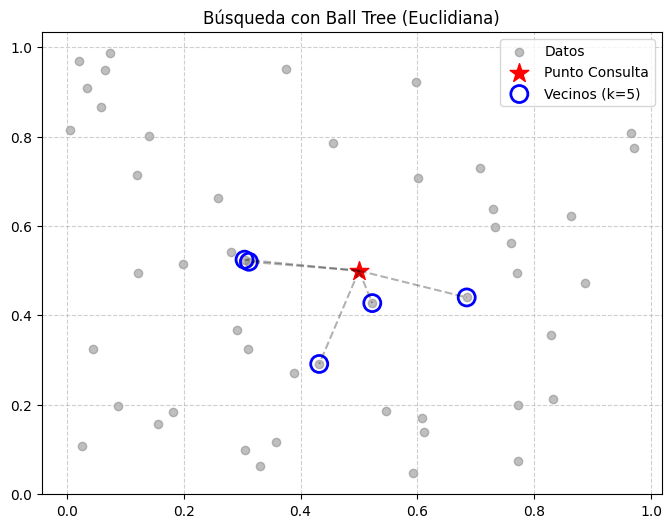


--- EJEMPLO 2: Búsqueda Geoespacial (Tierra) ---
Ciudades más cercanas a Bogotá ([4.711, -74.0721]):
1. Lima -> a 1892.07 km
2. CDMX -> a 3170.73 km


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import BallTree

# ======================================================
# EJEMPLO 1: BÚSQUEDA VISUAL EN 2D (Euclidiana)
# ======================================================
print("--- EJEMPLO 1: Búsqueda de Vecinos en 2D ---")

# 1. Generamos 50 datos aleatorios en 2D
rng = np.random.RandomState(42)
X = rng.random_sample((50, 2))  # Puntos entre [0, 1]

# 2. Construimos el Ball Tree
# leaf_size: Determina cuándo dejar de dividir nodos. 
# Afecta la velocidad de construcción vs consulta.
tree = BallTree(X, leaf_size=15, metric='euclidean')

# 3. Punto de consulta (¿Quiénes son los vecinos de este punto?)
query_point = [[0.5, 0.5]]

# 4. Buscamos los 5 vecinos más cercanos (k=5)
# retorna distancias y los índices de los puntos en X
dist, ind = tree.query(query_point, k=5)

print(f"Índices de los 5 vecinos más cercanos: {ind[0]}")
print(f"Distancias a los vecinos: {dist[0]}")

# --- VISUALIZACIÓN ---
plt.figure(figsize=(8, 6))
# Dibujar todos los puntos (Gris)
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5, label='Datos')
# Dibujar el punto de consulta (Rojo)
plt.scatter(query_point[0][0], query_point[0][1], c='red', marker='*', s=200, label='Punto Consulta')
# Dibujar los vecinos encontrados (Círculos Azules grandes)
plt.scatter(X[ind[0], 0], X[ind[0], 1], s=150, facecolors='none', edgecolors='blue', linewidths=2, label='Vecinos (k=5)')

# Dibujar líneas conectando
for i in ind[0]:
    plt.plot([query_point[0][0], X[i, 0]], [query_point[0][1], X[i, 1]], 'k--', alpha=0.3)

plt.title('Búsqueda con Ball Tree (Euclidiana)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# ======================================================
# EJEMPLO 2: EL SUPERPODER (Datos Geoespaciales / Haversine)
# ======================================================
print("\n--- EJEMPLO 2: Búsqueda Geoespacial (Tierra) ---")
# KD-Tree no funciona bien aquí porque la Tierra es curva. Ball Tree sí.

# Coordenadas: [Latitud, Longitud] (en grados)
# Ciudad de México, Buenos Aires, Madrid, Tokio, Nueva York
cities = {
    "CDMX": [19.4326, -99.1332],
    "Buenos Aires": [-34.6037, -58.3816],
    "Madrid": [40.4168, -3.7038],
    "Tokio": [35.6762, 139.6503],
    "Nueva York": [40.7128, -74.0060],
    "Lima": [-12.0464, -77.0428]
}

# Convertir diccionario a array y PASAR A RADIANES (Requisito de sklearn para Haversine)
city_names = list(cities.keys())
coords_deg = np.array(list(cities.values()))
coords_rad = np.radians(coords_deg)

# Construir Ball Tree con métrica 'haversine'
# La métrica haversine asume una esfera unitaria.
geo_tree = BallTree(coords_rad, metric='haversine')

# Punto de consulta: Bogotá, Colombia
bogota_deg = [4.7110, -74.0721]
bogota_rad = np.radians([bogota_deg])

# Buscar las 2 ciudades más cercanas a Bogotá en nuestra lista
k_geo = 2
dist_rad, ind_geo = geo_tree.query(bogota_rad, k=k_geo)

# Convertir distancia de radianes a kilómetros
# Radio de la Tierra aprox = 6371 km
earth_radius_km = 6371
dist_km = dist_rad[0] * earth_radius_km

print(f"Ciudades más cercanas a Bogotá ({bogota_deg}):")
for i, idx in enumerate(ind_geo[0]):
    name = city_names[idx]
    d_km = dist_km[i]
    print(f"{i+1}. {name} -> a {d_km:.2f} km")